In [1]:
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt

# Input

In [2]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [3]:
turbines = pd.read_csv("../build/turbines-DE.csv", index_col=0)
turbines = turbines.iloc[:, 2:]
turbines.columns = ['engineering', 'disamenity']
#turbines = turbines.round()
turbines['total'] = turbines['engineering'] + turbines['disamenity']
turbines 

,engineering,disamenity,total
0,20.569986,21.648275,42.218262
1,20.666000,25.402365,46.068366
2,20.666000,25.402365,46.068366
3,20.574173,24.580761,45.154934
4,20.574173,24.580761,45.154934
...,...,...,...
47721,249.230026,744.080204,993.310230
47722,119.502106,343.923431,463.425537
47723,249.230026,744.080204,993.310230
47724,106.737701,354.723347,461.461049


# LCOE back of the envelope

In [4]:
afc = -numpy_financial.pmt(params['wacc'], params['lifetime'], params['invest'])

In [5]:
lcoe = (afc + params['cost_qfix']) / 2200
lcoe

41.49837919283222

# Plot

In [6]:
plt.figure()

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

engineering_cost = turbines['lcoe_eur_per_mwh'].sort_values()
plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.ylim([0,100])

plt.legend()

KeyError: 'lcoe_eur_per_mwh'

<Figure size 432x288 with 0 Axes>

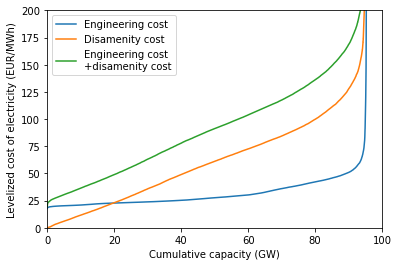

In [15]:
plt.figure()

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

engineering_cost = turbines['engineering'].sort_values()
plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')

disamenity_cost = turbines['disamenity'].sort_values()
plt.plot(cumulative_capacity, disamenity_cost, label='Disamenity cost')

total_cost = turbines['total'].sort_values()
plt.plot(cumulative_capacity, total_cost, label='Engineering cost\n+disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim([0,200])

plt.legend()

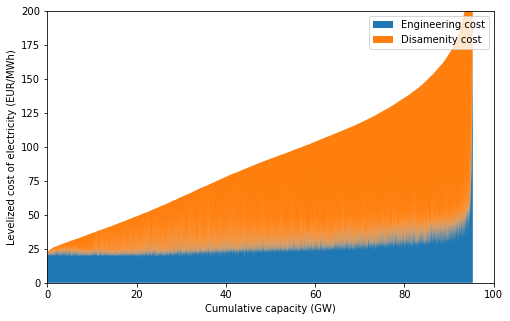

In [14]:
plt.figure(figsize=[8,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

engineering_cost = turbines.sort_values(['total', 'engineering'])['engineering']
plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = turbines.sort_values('total')['total']
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='Disamenity cost')

#engineering_cost = turbines['disamenity_cost_eur_per_mwh'].sort_values()
#plt.plot(cumulative_capacity, engineering_cost, label='Disamenity cost')

#total_cost = (turbines['lcoe_eur_per_mwh'] + turbines['disamenity_cost_eur_per_mwh']).sort_values()
#plt.plot(cumulative_capacity, disamenity_cost, label='Engineering cost\n+disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim([0,200])

plt.legend()

(0.0, 200.0)

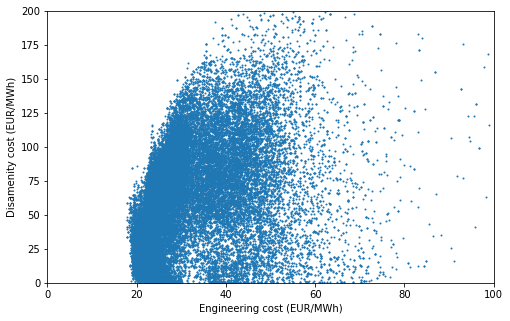

In [13]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 200)